In [1]:
!pip install datasets pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from datasets import load_dataset
import pandas as pd

# Load dataset
dataset = load_dataset("fancyzhx/ag_news")

# Convert to Pandas DataFrame
df_train = pd.DataFrame(dataset["train"])
df_test = pd.DataFrame(dataset["test"])

df_train.columns=["Title","label"]
df_test.columns=["Title","label"]



In [21]:
# Clean data pipeline
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])  # Remove stopwords
    return text

# Apply cleaning function
df_train["clean_text"] = df_train["Title"].apply(clean_text)
df_test["clean_text"] = df_test["Title"].apply(clean_text)

# Display cleaned text
print(df_train[["Title", "clean_text"]].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               Title  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                          clean_text  
0  wall st bears claw back black reuters reuters ...  
1  carlyle looks toward commercial aerospace reut...  
2  oil economy cloud stocks outlook reuters reute...  
3  iraq halts oil exports main southern pipeline ...  
4  oil prices soar time record posing new menace ...  


#### This cleaning pipeline method is used for cleaning the unnecessary spaces and special characters in the title or description of the data

### Split the Data (Before Feature Extraction)

In [22]:
from sklearn.model_selection import train_test_split

# Define features (X) and labels (Y)
X = df_train["Title"] 
Y = df_train["label"]

# Split the dataset
train_test_split(df_train["clean_text"], df_train["label"], test_size=0.2, random_state=42)

# Print shapes to verify
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (96000,)
Test set size: (24000,)


### Feature Extraction using Bag-of-words( COunt Vectorizer)

Count Vectorizer: CountVectorizer is a feature extraction technique in Natural Language Processing (NLP) that converts text data into numerical form by counting the occurrence of words in a document. It is part of Bag-of-Words (BoW) representation.


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text into numerical features using COuntVectorizer( bagofwords)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

### Train the model ( LogisticRegression)

In [24]:
from sklearn.linear_model import LogisticRegression

# Training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_counts, Y_train)

# making pred.
Y_pred = model.predict(X_test_counts)

### Evaluating the model:

1. Accuracy of the model
2. Classification Report
3. Confusion Matrix

model_accuracy: 0.9034583333333334

Classification report:

              precision    recall  f1-score   support

       World       0.91      0.89      0.90      6011
      Sports       0.95      0.97      0.96      5997
    Business       0.88      0.88      0.88      6017
Science/Tech       0.88      0.88      0.88      5975

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



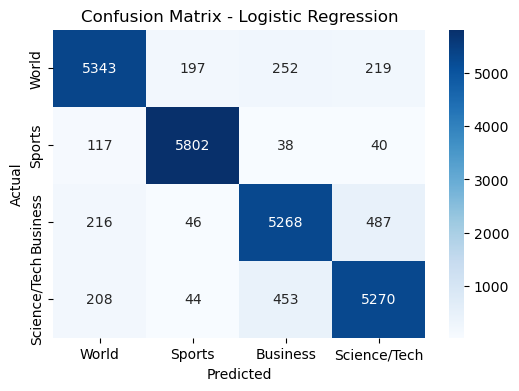

In [25]:
# CONfusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# plot accuracy
print("model_accuracy:",accuracy_score(Y_test,Y_pred))

# Classification report
print("\nClassification report:\n")
print(classification_report(Y_test,Y_pred,target_names=["World","Sports","Business", "Science/Tech"]))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap="Blues", 
            xticklabels=["World", "Sports", "Business", "Science/Tech"], 
            yticklabels=["World", "Sports", "Business", "Science/Tech"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()